<a href="https://colab.research.google.com/github/Foysal1565/COVID-19-Chest-X-ray-Dataset-and-CNN-model-ICCECE/blob/master/COVID_19_Detector_Final_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dataset = http://cb.lk/covid_19
#!wget http://cb.lk/covid_19

In [ ]:
!unzip covid_19

Archive:  covid_19.zip
   creating: Dataset3/
   creating: Dataset3/Test/
   creating: Dataset3/Test/Covid/
  inflating: Dataset3/Test/Covid/covid-19-pneumonia-mild.JPG  
  inflating: Dataset3/Test/Covid/d009d61f.jpg  
  inflating: Dataset3/Test/Covid/e1446fe8.jpg  
  inflating: Dataset3/Test/Covid/E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg  
  inflating: Dataset3/Test/Covid/eb8e8a5b.jpg  
  inflating: Dataset3/Test/Covid/ec083e35.jpg  
  inflating: Dataset3/Test/Covid/extubation-1.jpg  
  inflating: Dataset3/Test/Covid/extubation-4.jpg  
  inflating: Dataset3/Test/Covid/f0864aff.jpg  
  inflating: Dataset3/Test/Covid/F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg  
  inflating: Dataset3/Test/Covid/F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg  
  inflating: Dataset3/Test/Covid/F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg  
  inflating: Dataset3/Test/Covid/f64132c8.jpg  
  inflating: Dataset3/Test/Covid/f6d980a0.jpg  
  inflating: Dataset3/Test/Covid/f8335316.jpg  
  inflating: Dataset3/Test/Covid/

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH ="CovidDataset/Test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
#CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3 ),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [ ]:
# Train from Scratch 

train_datagen = image.ImageDataGenerator(
    rescale= 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,

)

test_dataset = image.ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 330 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
    )

Found 82 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps= 2)

Epoch 1/25
10/10 [==============================] - 14s 1s/step - loss: 1.3266 - accuracy: 0.5000 - val_loss: 0.6876 - val_accuracy: 0.4688
Epoch 2/25
10/10 [==============================] - 12s 1s/step - loss: 0.6675 - accuracy: 0.6879 - val_loss: 0.6085 - val_accuracy: 1.0000
Epoch 3/25
10/10 [==============================] - 10s 1s/step - loss: 0.5039 - accuracy: 0.7752 - val_loss: 0.4261 - val_accuracy: 0.9200
Epoch 4/25
10/10 [==============================] - 12s 1s/step - loss: 0.3525 - accuracy: 0.8691 - val_loss: 0.2077 - val_accuracy: 0.9531
Epoch 5/25
10/10 [==============================] - 11s 1s/step - loss: 0.3042 - accuracy: 0.8926 - val_loss: 0.2494 - val_accuracy: 0.9600
Epoch 6/25
10/10 [==============================] - 11s 1s/step - loss: 0.2347 - accuracy: 0.9094 - val_loss: 0.0604 - val_accuracy: 1.0000
Epoch 7/25
10/10 [==============================] - 11s 1s/step - loss: 0.1610 - accuracy: 0.9420 - val_loss: 0.0474 - val_accuracy: 0.9844
Epoch 8/25
10/10 [==

In [ ]:
model.evaluate_generator(train_generator)

[0.030226852744817734, 0.978787899017334]

In [ ]:
model.evaluate_generator(validation_generator)

[0.01832234114408493, 0.9878048896789551]

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test = []

In [ ]:
import os
for i in os.listdir("./CovidDataset/Test/Normal/"):
  img = image.load_img("./CovidDataset/Test/Normal/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
for i in os.listdir("./CovidDataset/Test/Covid/"):
  img = image.load_img("./CovidDataset/Test/Covid/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual, y_test)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


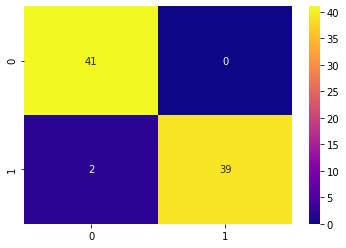

In [ ]:
sns.heatmap(cm, cmap="plasma", annot= True)

In [ ]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_actual, y_test)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)

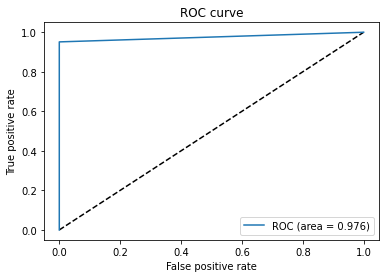

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

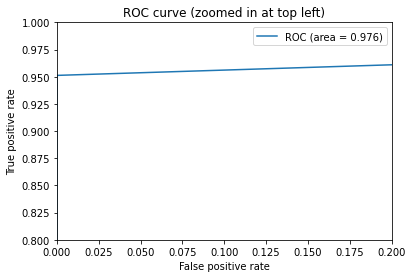

In [ ]:
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()